In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [4]:
#fetching the dataset
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y =True
)
pixel_values,targets = data
targets = targets.astype(int)

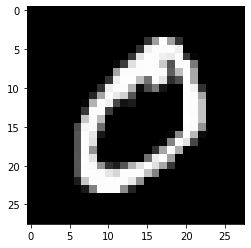

In [6]:
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [8]:
tsne = manifold.TSNE(n_components=2,random_state=2)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

In [10]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data,targets[:3000])),
    columns =["x","y","targets"]
)

In [12]:
tsne_df.head()

,x,y,targets
0,-29.995388,-3.906635,5.0
1,-68.586082,-23.333933,0.0
2,35.714264,-45.310791,4.0
3,29.261246,38.299160,1.0
4,35.692738,-16.477219,9.0


In [15]:
tsne_df.loc[:,'targets']=tsne_df.targets.astype(int)

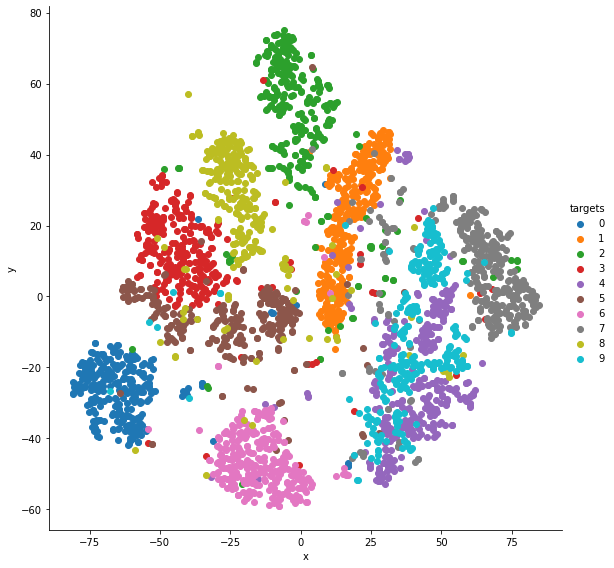

In [16]:
grid = sns.FacetGrid(tsne_df,hue="targets",size=8)
grid.map(plt.scatter,"x","y").add_legend()